# Ecommerce Churn Prediction | Data Mining

> ### Objective of Project:
> Building a Churn Prediction Model for Ecommerce Company: A Comparative Study of Classification Algorithms and Deep Learning Architectures

### Libraries and imports

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
!pip install -U imbalanced-learn
!pip install folium
!pip install graphviz

ERROR: Could not find a version that satisfies the requirement folium (from versions: none)
ERROR: No matching distribution found for folium


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

from sklearn import tree


### Exploring Dataset of Telecommunication Customers for Pattern finding

In [5]:
Dataset_description_sheet = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="Data Dict",usecols=[2,3],header=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Dataset_description_sheet

Variable  \
0                    CustomerID   
1                         Churn   
2                        Tenure   
3          PreferredLoginDevice   
4                      CityTier   
5               WarehouseToHome   
6          PreferredPaymentMode   
7                        Gender   
8                HourSpendOnApp   
9      NumberOfDeviceRegistered   
10             PreferedOrderCat   
11            SatisfactionScore   
12                MaritalStatus   
13              NumberOfAddress   
14                     Complain   
15  OrderAmountHikeFromlastYear   
16                   CouponUsed   
17                   OrderCount   
18            DaySinceLastOrder   
19               CashbackAmount   

                                          Discerption  
0                                  Unique customer ID  
1                                          Churn Flag  
2                  Tenure of customer in organization  
3                  Preferred login device of customer  
4                                           City tier  
5   Distance in between warehouse to home of customer  
6                Preferred payment method of customer  
7                                  Gender of customer  
8   Number of hours spend on mobile application or...  
9   Total number of deceives is registered on part...  
10  Preferred order category of customer in last m...  
11          Satisfactory score of customer on service  
12                         Marital status of customer  
13  Total number of added added on particular cust...  
14        Any complaint has been raised in last month  
15       Percentage increases in order from last year  
16  Total number of coupon has been used in last m...  
17  Total number of orders has been places in last...  
18                   Day Since last order by customer  
19                     Average cashback in last month

In [6]:
#Dataset
Ecommerce_data = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")
Ecommerce_data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [8]:
Ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
Ecommerce_data.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

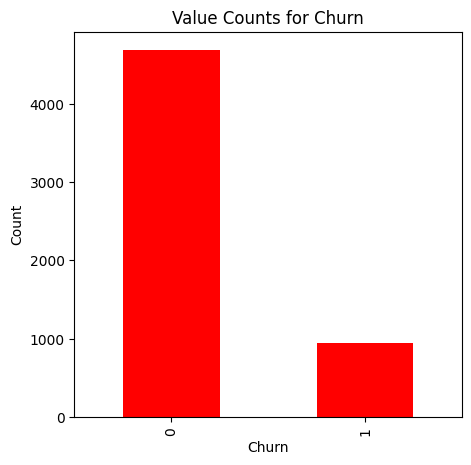

0    4682
1     948
Name: Churn, dtype: int64


In [10]:
#Value Counts for categorical columns

value_counts_col = Ecommerce_data['Churn'].value_counts()

plt.figure(figsize=(5, 5))
value_counts_col.plot(kind='bar', color='red')
plt.title(f"Value Counts for Churn")
plt.xlabel('Churn')
plt.ylabel("Count")

plt.show()
print(value_counts_col)

In [11]:
for col in Ecommerce_data.columns:
    if Ecommerce_data[col].dtype != 'int64' and Ecommerce_data[col].dtype != 'float64':
        print(f'{col} : {Ecommerce_data[col].unique()}')

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender : ['Female' 'Male']
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus : ['Single' 'Divorced' 'Married']


### Missing values

In [12]:
print("Before Dropping Missing values:", Ecommerce_data.isna().sum())
Ecommerce_data.dropna(inplace=True)
print("After Dropping missing values: ",Ecommerce_data.isna().sum().sum())

Before Dropping Missing values: CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64
After Dropping missing values:  0


In [13]:
#Label Encoding
Encoded_data = Ecommerce_data.copy()
Encoded_data.drop(['CustomerID','OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','Churn'],axis=1,inplace=True)

label_Encoder = LabelEncoder()
Encoded_data = Encoded_data.apply(lambda x: label_Encoder.fit_transform(x))
Encoded_data[['OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','Churn']] = Ecommerce_data[['OrderAmountHikeFromlastYear','DaySinceLastOrder','CashbackAmount','Churn']]
Encoded_data.head()

# telcom total charge replace('','0').astype(float)

# Encoded_data.TotalCharges = Encoded_data.TotalCharges.replace(' ','0')
# Encoded_data.TotalCharges = Encoded_data.TotalCharges.astype(float)




Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0        4                     1         2                1   
3        0                     2         2               10   
5        0                     0         0               17   
11      11                     1         0                1   
12       0                     2         0                6   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                      4       0               3                         2   
3                      4       1               2                         3   
5                      4       0               3                         4   
11                     4       1               3                         3   
12                     1       1               2                         2   

    PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                  2                  1              2                8   
3                  2                  4              2                7   
5                  4                  4              2                1   
11                 0                  2              2                9   
12                 3                  2              2                1   

    Complain  CouponUsed  OrderCount  OrderAmountHikeFromlastYear  \
0          1           1           0                         11.0   
3          0           0           0                         23.0   
5          1           4           5                         22.0   
11         1           0           0                         13.0   
12         1           2           1                         13.0   

    DaySinceLastOrder  CashbackAmount  Churn  
0                 5.0          159.93      1  
3                 3.0          134.07      1  
5                 7.0          139.19      1  
11                0.0          153.81      1  
12                2.0          134.41      1

In [14]:
#encoding object columns
# object_columns = telecom.select_dtypes(include=["object"])
# encoded_object_columns = pd.get_dummies(object_columns)
# encoded_data = pd.concat([telecom.drop(columns=object_columns), encoded_object_columns], axis=1)

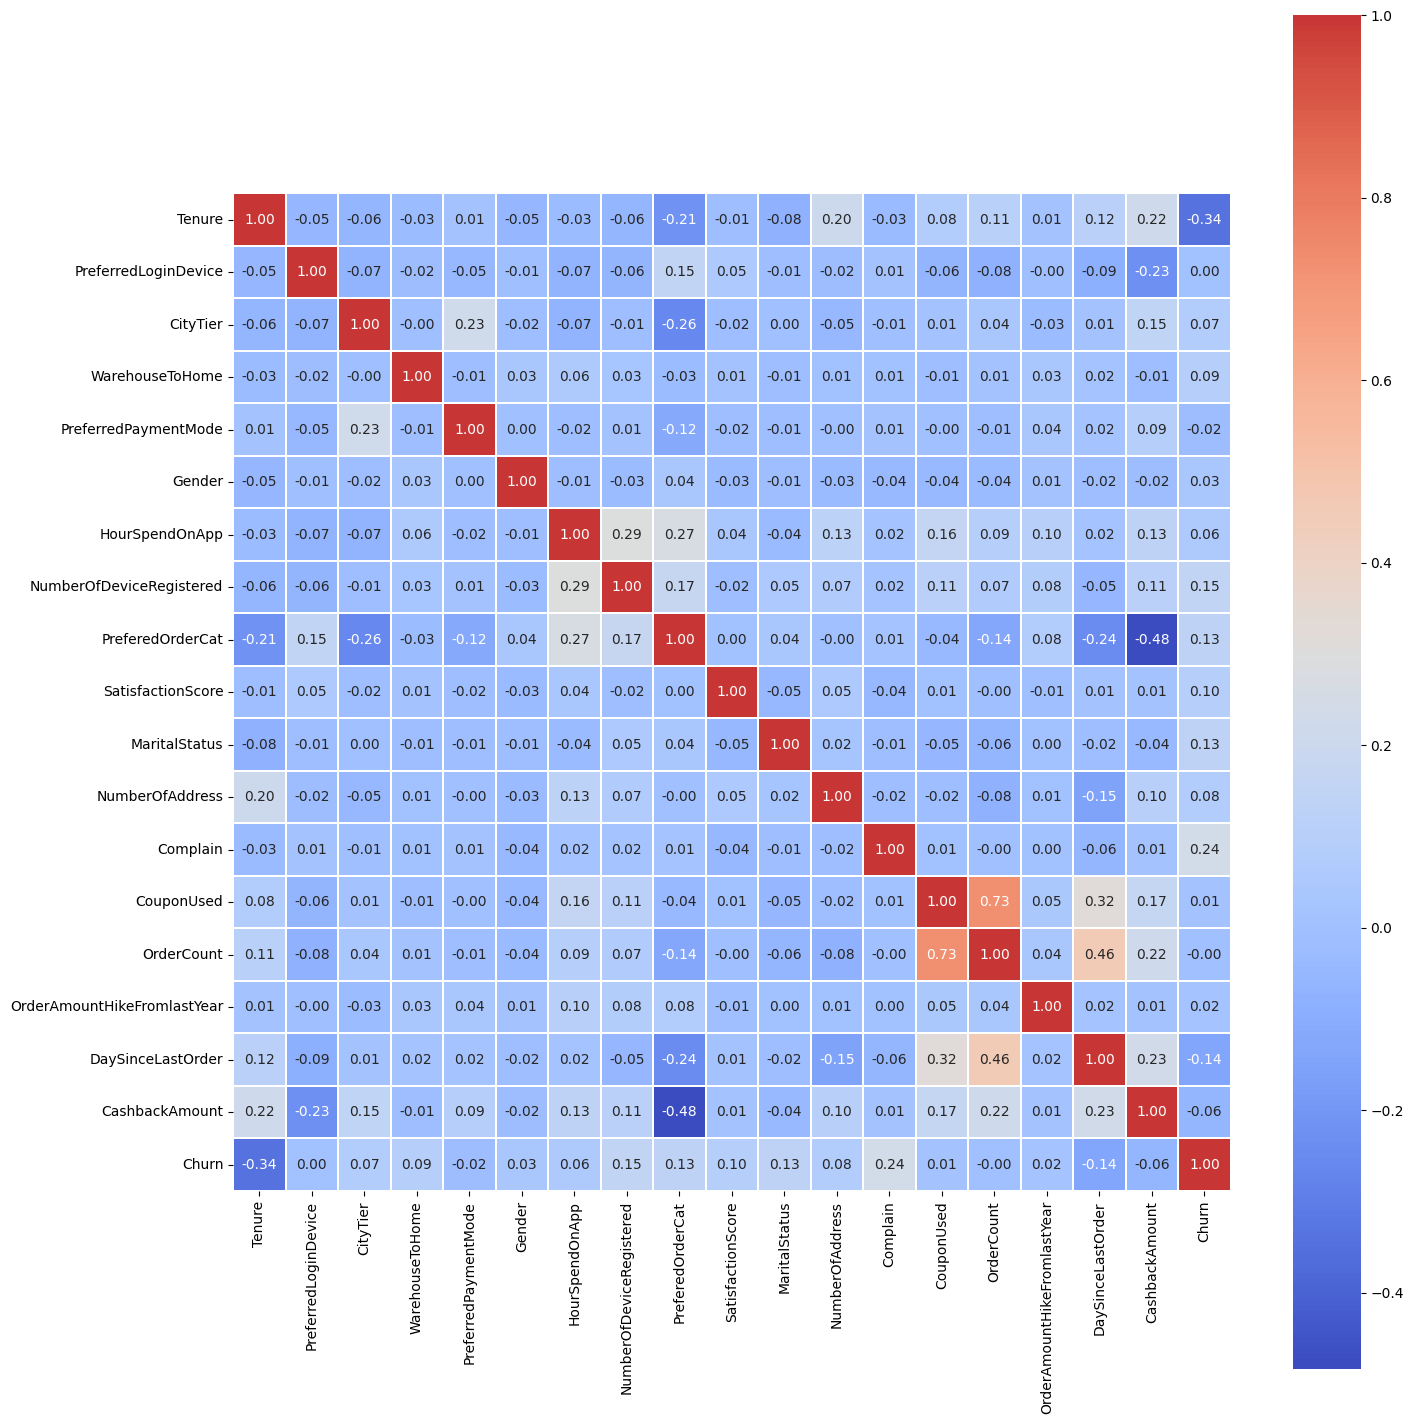

<Figure size 640x480 with 0 Axes>

In [15]:
#Correlation Matrix

corr_mat = Encoded_data.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat, annot=True , fmt = '.2f',linewidths=0.25, center= 0.3, cmap= 'coolwarm', square=True)
plt.tight_layout()
plt.show()
plt.clf()

In [16]:
Encoded_data.describe()


Tenure  PreferredLoginDevice     CityTier  WarehouseToHome  \
count  3774.000000           3774.000000  3774.000000      3774.000000   
mean      8.767356              0.898251     0.707737        10.696608   
std       7.637732              0.690500     0.936725         8.222451   
min       0.000000              0.000000     0.000000         0.000000   
25%       1.000000              0.000000     0.000000         4.000000   
50%       8.000000              1.000000     0.000000         9.000000   
75%      13.000000              1.000000     2.000000        16.000000   
max      33.000000              2.000000     2.000000        33.000000   

       PreferredPaymentMode       Gender  HourSpendOnApp  \
count           3774.000000  3774.000000     3774.000000   
mean               3.668786     0.601749        2.981187   
std                1.234926     0.489603        0.722158   
min                0.000000     0.000000        0.000000   
25%                3.000000     0.000000        2.000000   
50%                4.000000     1.000000        3.000000   
75%                4.000000     1.000000        3.000000   
max                6.000000     1.000000        5.000000   

       NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
count               3774.000000       3774.000000        3774.000000   
mean                   2.754107          2.459724           2.056439   
std                    1.025233          1.278725           1.389730   
min                    0.000000          0.000000           0.000000   
25%                    2.000000          2.000000           1.000000   
50%                    3.000000          2.000000           2.000000   
75%                    3.000000          4.000000           3.000000   
max                    5.000000          5.000000           4.000000   

       MaritalStatus  NumberOfAddress     Complain   CouponUsed   OrderCount  \
count    3774.000000      3774.000000  3774.000000  3774.000000  3774.000000   
mean        1.184950         3.210122     0.282194     1.719131     1.825384   
std         0.663881         2.530198     0.450127     1.670298     2.467597   
min         0.000000         0.000000     0.000000     0.000000     0.000000   
25%         1.000000         1.000000     0.000000     1.000000     0.000000   
50%         1.000000         2.000000     0.000000     1.000000     1.000000   
75%         2.000000         5.000000     1.000000     2.000000     2.000000   
max         2.000000        13.000000     1.000000    14.000000    15.000000   

       OrderAmountHikeFromlastYear  DaySinceLastOrder  CashbackAmount  \
count                   3774.00000        3774.000000     3774.000000   
mean                      15.72761           4.526232      164.213590   
std                        3.62991           3.371310       24.093966   
min                       11.00000           0.000000        0.000000   
25%                       13.00000           2.000000      148.485000   
50%                       15.00000           3.000000      160.050000   
75%                       18.00000           7.000000      178.010000   
max                       26.00000          46.000000      324.990000   

             Churn  
count  3774.000000  
mean      0.167197  
std       0.373201  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [17]:
#outlier if needed

### Class Imbalancing

In [18]:

y = Encoded_data['Churn']
X = Encoded_data.drop('Churn', axis=1)
# Resampling
resample = SMOTETomek(random_state=42)
X_res, y_res = resample.fit_resample(X, y)

ax = sns.countplot(x=y_res)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

Pair Plots¶
This allows us to view the distributions and relationships between numerical variables. From the histograms on the diagonal, there are a few observations that can be made:

Tenure - Non-Churned

Two peaks: Very low tenure and very high. We could investigate which demographics belong to these peaks (if any). I would predict that senior citizens are less likely to change service providers. We could also compare the types of packages to tenure length and see if there's any correlation.
Tenure - Churned

One Peak: Very clear trend that the shorter the tenure, the stronger the correlation to churning.
Monthly Charges - All Samples

Three modes: $35, \$50, $80. Likely similar to the default package prices available to customers with the most popular being the cheapest plan.
Total Charges - All Samples

Vast majority of customers have relatively low total charges. This makes sense as the total charge column is dependent on tenure and monthly charge.
There is a clear linear relationship between all variables with the exception of tenure vs MonthlyCharges.

In [19]:

numerics = Ecommerce_data.select_dtypes(include=[int, float])
numerics["Churn"] = Ecommerce_data["Churn"]

sns.pairplot(data=numerics, hue="Churn", plot_kws={'alpha': 0.3})
plt.show()
plt.clf()

KeyboardInterrupt: 

We can more clearly see some of the relationships if we reduce the variation in possible monthly charges. We can see that for service plans cheaper than 35 dollars, the tenure and TotalCharges distributions have kept their shape but the MonthlyCharges values have fallen into more discrete modes with plans varying by roughly 5 dollars.

In [ ]:
numeric = pd.DataFrame(data=Encoded_data,columns=["OrderAmountHikeFromlastYear","CashbackAmount","Churn"])
print("Summary Statistics of Non-Churned Customers")
print(numeric[numeric["Churn"] == False].describe())

print("\nSummary Statistics of Churned Customers")
print(numeric[numeric["Churn"] == True].describe())

Summary Statistics of Non-Churned Customers
       OrderAmountHikeFromlastYear  CashbackAmount   Churn
count                  3143.000000     3143.000000  3143.0
mean                     15.699650      164.847821     0.0
std                       3.588939       24.002068     0.0
min                      11.000000        0.000000     0.0
25%                      13.000000      149.000000     0.0
50%                      15.000000      161.880000     0.0
75%                      18.000000      178.655000     0.0
max                      26.000000      324.990000     0.0

Summary Statistics of Churned Customers
       OrderAmountHikeFromlastYear  CashbackAmount  Churn
count                   631.000000      631.000000  631.0
mean                     15.866878      161.054501    1.0
std                       3.827390       24.320397    0.0
min                      11.000000      110.090000    1.0
25%                      13.000000      147.070000    1.0
50%                      15.000000  

In [ ]:
Encoded_data.head()

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0        4                     1         2                1   
3        0                     2         2               10   
5        0                     0         0               17   
11      11                     1         0                1   
12       0                     2         0                6   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                      4       0               3                         2   
3                      4       1               2                         3   
5                      4       0               3                         4   
11                     4       1               3                         3   
12                     1       1               2                         2   

    PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                  2                  1              2                8   
3                  2                  4              2                7   
5                  4                  4              2                1   
11                 0                  2              2                9   
12                 3                  2              2                1   

    Complain  CouponUsed  OrderCount  OrderAmountHikeFromlastYear  \
0          1           1           0                         11.0   
3          0           0           0                         23.0   
5          1           4           5                         22.0   
11         1           0           0                         13.0   
12         1           2           1                         13.0   

    DaySinceLastOrder  CashbackAmount  Churn  
0                 5.0          159.93      1  
3                 3.0          134.07      1  
5                 7.0          139.19      1  
11                0.0          153.81      1  
12                2.0          134.41      1

# Visualizations

In [ ]:
# Interactive Pair Plots using Plotly
fig = px.scatter_matrix(Encoded_data, dimensions=list(Encoded_data.columns),
                        color='Churn', title='Interactive Pair Plot')
fig.update_traces(diagonal_visible=False)
fig.show()

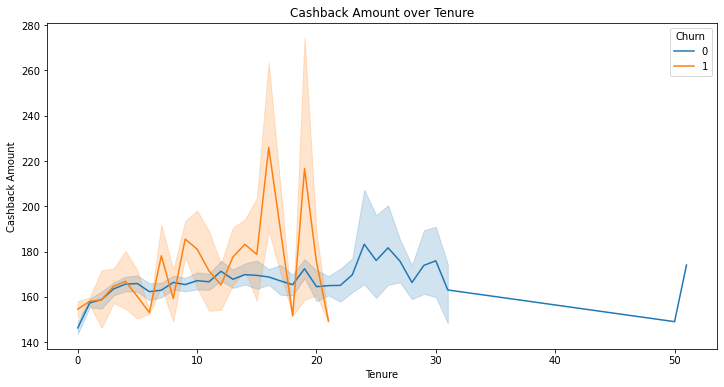

In [ ]:
# Temporal Analysis using Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tenure', y='CashbackAmount', data=Ecommerce_data, hue='Churn')
plt.title('Cashback Amount over Tenure')
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')
plt.show()

In [ ]:
# Interactive Bar Chart
gender_counts = Encoded_data['Gender'].value_counts()
fig = go.Figure(data=[go.Bar(x=gender_counts.index, y=gender_counts.values)])
fig.update_layout(title='Count of Customers by Gender', xaxis_title='Gender', yaxis_title='Count', template='plotly_dark')
fig.show()

In [ ]:
# Violin Plot with Split Violins
fig = px.violin(Encoded_data, y='Tenure', x='Churn', color='Churn', box=True, points='all', title='Tenure Distribution by Churn',
                violinmode='group', template='plotly_dark')
fig.show()

In [ ]:
# 3D Scatter Plot
fig = px.scatter_3d(Encoded_data, x='Tenure', y='HourSpendOnApp', z='CashbackAmount', color='Churn', title='3D Scatter Plot',
                    symbol='Churn', opacity=0.7, template='plotly_dark')
fig.show()

In [ ]:

# Histogram with Density Curve
fig = go.Figure()
fig.add_trace(go.Histogram(x=Encoded_data['Tenure'], histnorm='probability', name='Tenure'))
fig.add_trace(go.Histogram(x=Encoded_data['HourSpendOnApp'], histnorm='probability', name='HourSpendOnApp'))
fig.update_layout(barmode='overlay', title='Histogram with Density Curve', template='plotly_dark')
fig.show()

In [ ]:
fig = px.scatter(Ecommerce_data, x='Tenure', y='CashbackAmount', color='Churn',
                 hover_data=['PreferredLoginDevice', 'CityTier', 'WarehouseToHome'],
                 title='Interactive Scatter Plot')
fig.show()

# Plotting visualizations for each feature with respect to churn

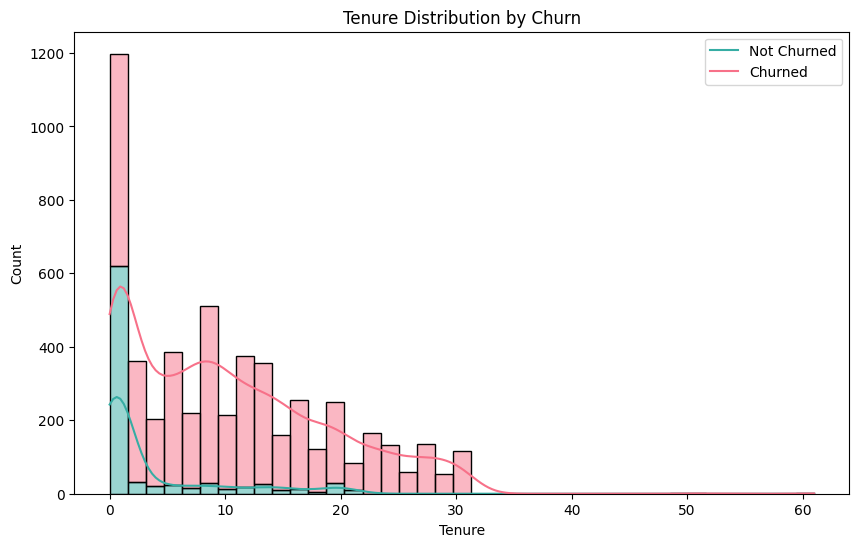

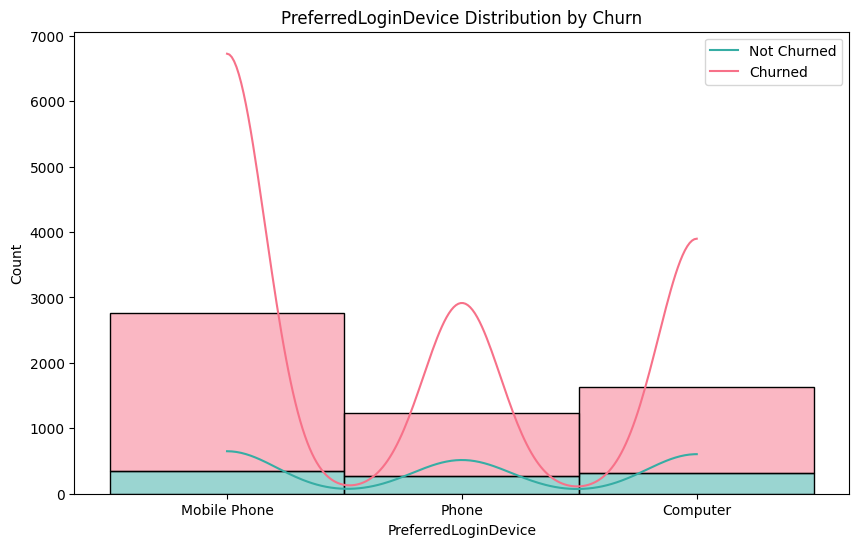

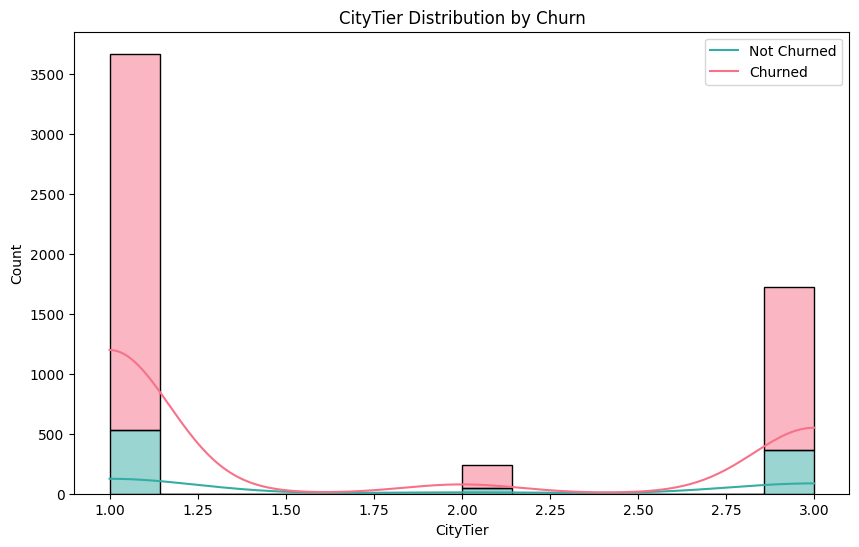

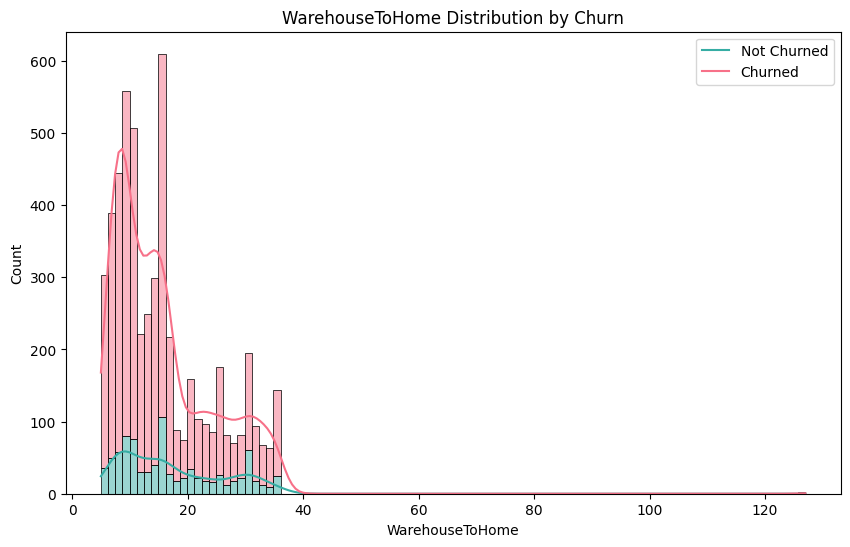

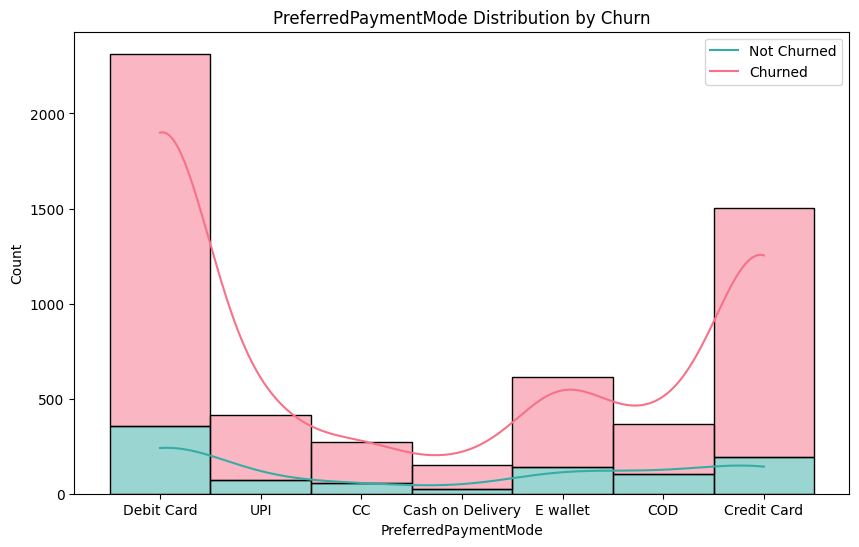

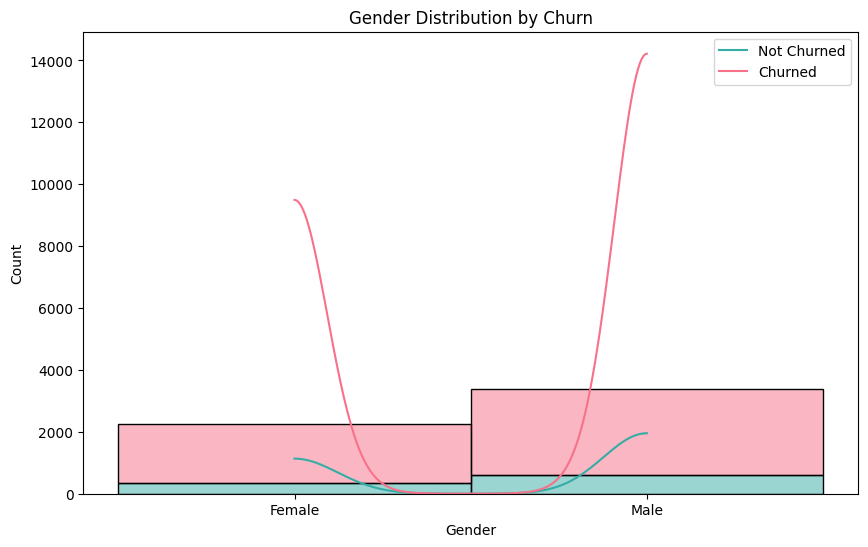

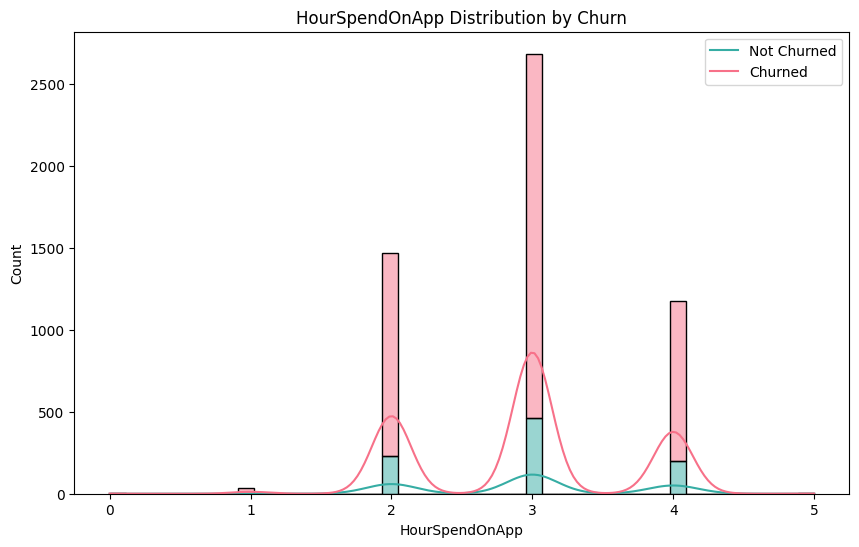

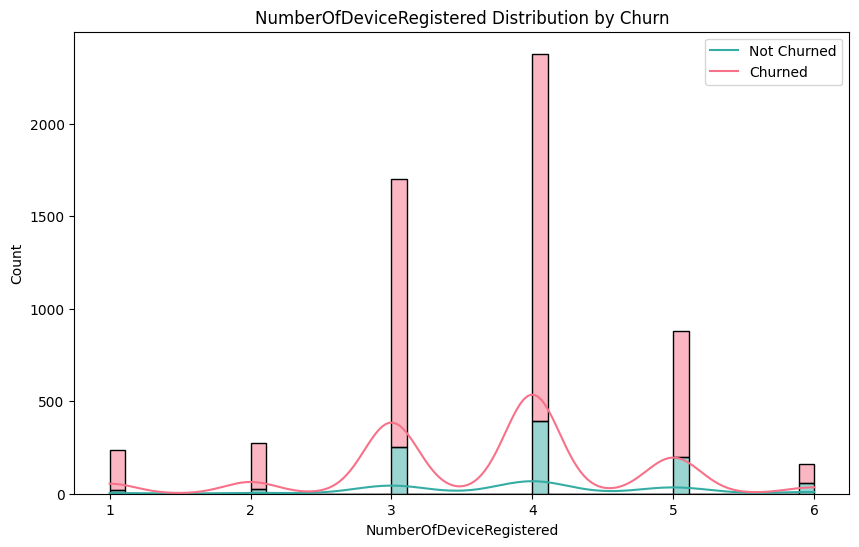

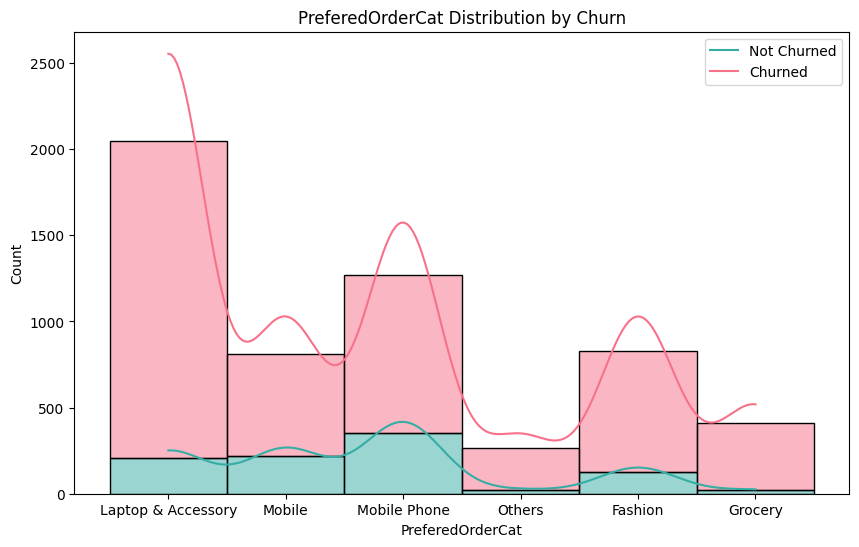

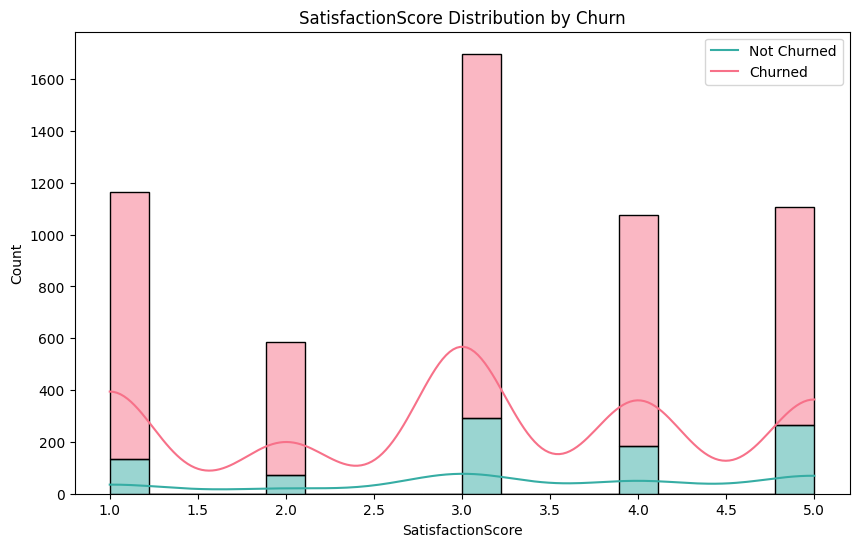

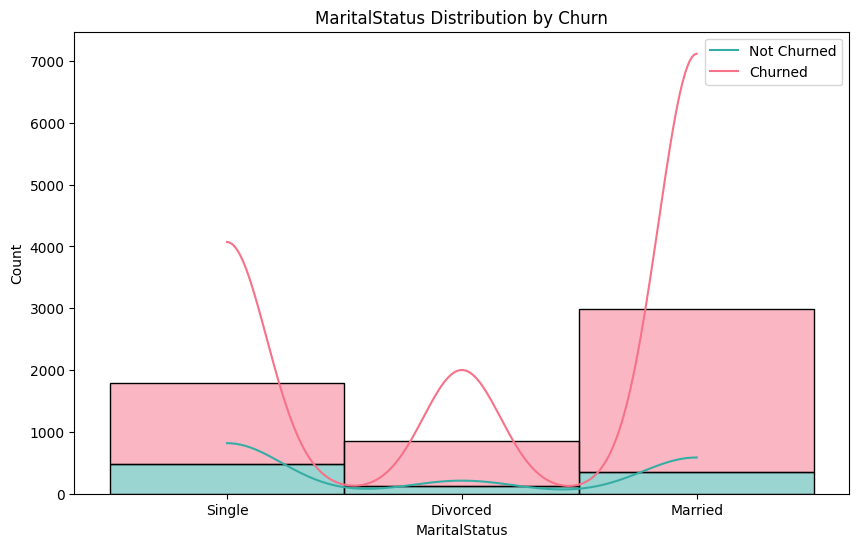

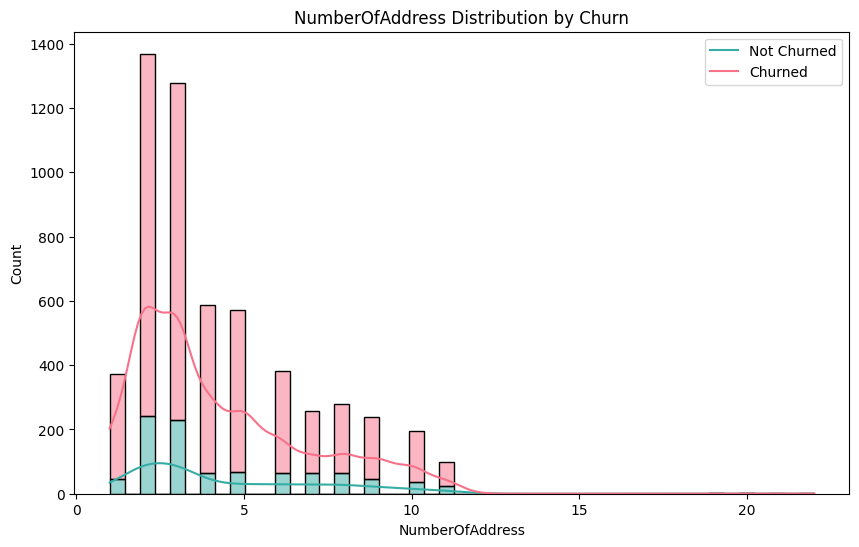

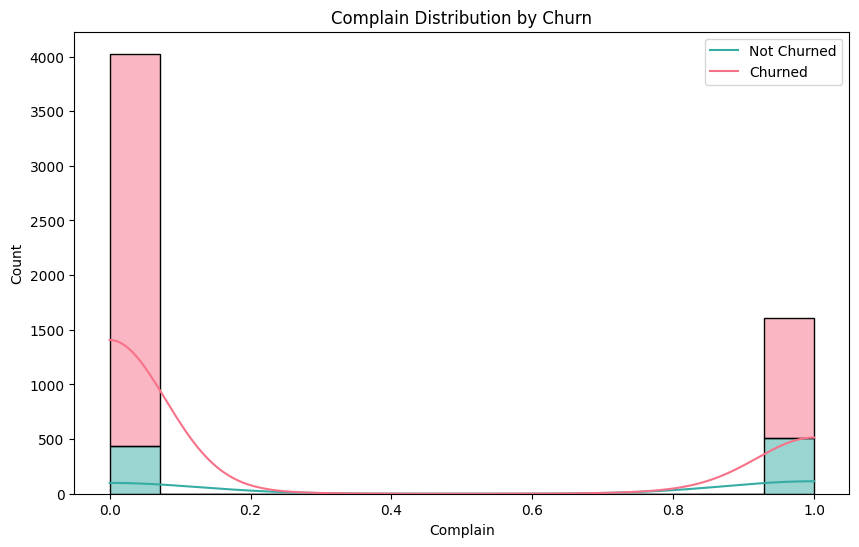

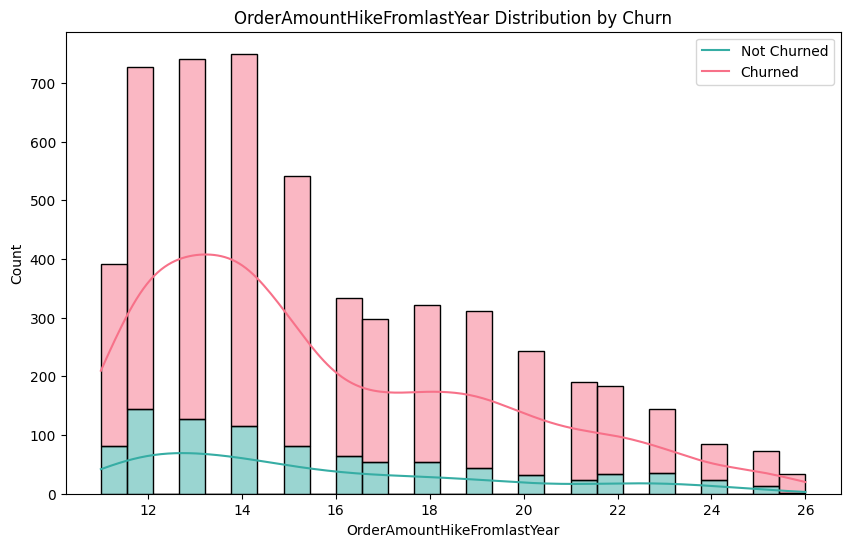

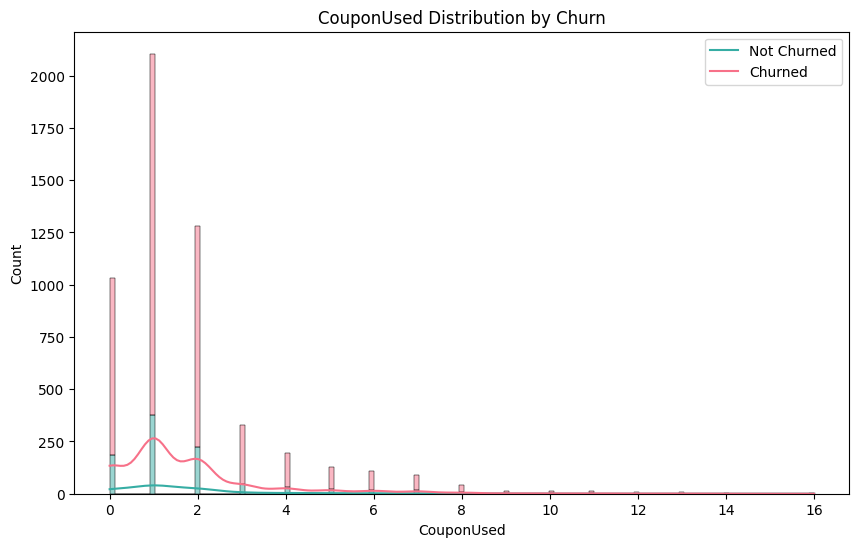

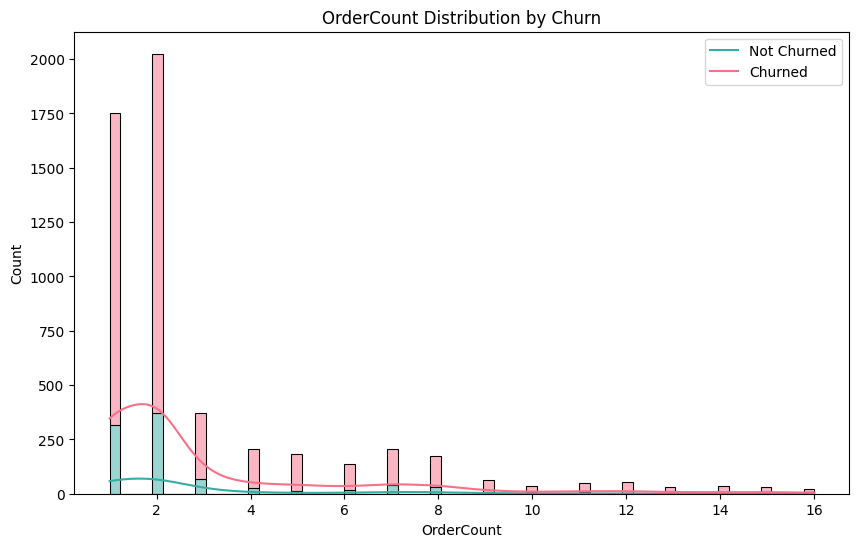

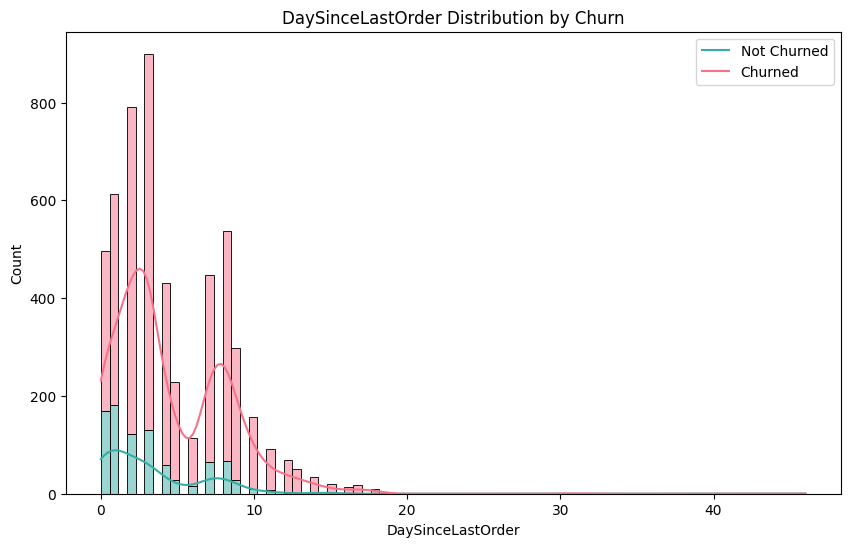

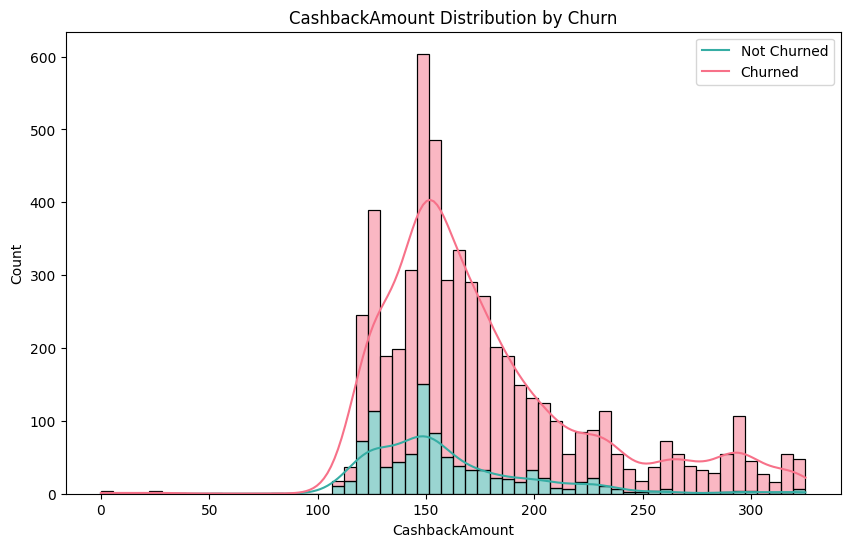

In [7]:
features = ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
            'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
            'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
            'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
            'DaySinceLastOrder', 'CashbackAmount']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=Ecommerce_data, x=feature, hue='Churn', kde=True, multiple="stack", palette='husl')
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Not Churned', 'Churned'])
    plt.show()
